In [1]:
# Part 1
# Adapt the code from class that reads GHCN Daily Data from Amazon Web Services and write a function that will download the station you want 
# (called with a GHCN station ID), and
# calculate (1) the all time record high and low and 
# (2) the normal (mean) high and low temperature *FOR EACH CALENDAR DAY* for the 1991-2020 period for the desired station.  
# The function should return a pandas data frame with the columns ['record_min_temp', average_min_temp', 'average_max_temp', record_max_temp'] FOR EACH DAY.  
# Write a code that can call this function and successfully demonstrate that it works.


In [2]:
# Part 2
# Develop a plot (using matplotlib) that displays for the city of choice a plot showing the record, average, and actual high and low temperatures 
# for that year and city for each day over the calendar year.  
#
# Note: You do not need to make the chart interactive, you can just plot the data from a your city and for the year of your choice.
#
# You are permitted to use the "weather" example from the `bokeh` gallery as inspiration.  
# An example for what the plot could look like is here: [Weather](https://demo.bokeh.org/weather), 
# and the GitHub repository for the dashboard is [here](https://github.com/bokeh/bokeh/tree/branch-3.9/examples/server/app/weather). 
# Note that you do not have to use bokeh for this assignment, you can use matplotlib!

In [4]:
# Import pandas and read in the NOAA GHCN (Global Historical Climatology Network) daily data from Amazon Web Services
# Show station IDs
# Find station ID txt file here: https://noaa-ghcn-pds.s3.amazonaws.com/index.html

import pandas as pd

stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


In [5]:
# Open the station ID inventory file 
# Show periods to see each site, each variable, and years that each variable is available

periods = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt', header=None, infer_nrows=1000)
periods.columns = ['ID','LAT','LON','ELEM','TiMIN','TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767053,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767054,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767055,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767056,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [6]:
# Use pandas to merge the two dataframes based on the ID column (the similar column between 2 txt files) 

merged_stns = pd.merge(stn_ids,periods,how='left',left_on='ID',right_on='ID')
merged_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMAX,1949.0,1949.0
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMIN,1949.0,1949.0
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,PRCP,1949.0,1949.0
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNOW,1949.0,1949.0
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNWD,1949.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767089,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,PRCP,1951.0,2025.0
767090,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,TAVG,1962.0,2025.0
767091,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMAX,1951.0,1990.0
767092,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMIN,1951.0,1990.0


In [7]:
#subset for T
# Find which stations stopped recording in 2025
merged_stns = merged_stns[(merged_stns['ELEM'] == 'TMAX') & (merged_stns['TiMAX'] == 2025)]
merged_stns


,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
18,AE000041196,25.3330,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0,25.3330,55.517,TMAX,1944.0,2025.0
22,AEM00041194,25.2550,55.364,10.4,NaN,DUBAI INTL,NaN,41194.0,25.2550,55.364,TMAX,1983.0,2025.0
26,AEM00041217,24.4330,54.651,26.8,NaN,ABU DHABI INTL,NaN,41217.0,24.4330,54.651,TMAX,1983.0,2025.0
30,AEM00041218,24.2620,55.609,264.9,NaN,AL AIN INTL,NaN,41218.0,24.2620,55.609,TMAX,1994.0,2025.0
54,AG000060390,36.7167,3.250,24.0,NaN,ALGER-DAR EL BEIDA,GSN,60390.0,36.7167,3.250,TMAX,1940.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767021,ZA000067743,-17.8170,25.817,986.0,NaN,LIVINGSTONE,GSN,67743.0,-17.8170,25.817,TMAX,1973.0,2025.0
767026,ZAM00067663,-14.4500,28.467,1207.0,NaN,KABWE/MILLIKEN,NaN,67663.0,-14.4500,28.467,TMAX,1973.0,2025.0
767038,ZI000067775,-17.9170,31.133,1480.0,NaN,HARARE (KUTSAGA),GSN,67775.0,-17.9170,31.133,TMAX,1956.0,2025.0
767079,ZI000067975,-20.0670,30.867,1095.0,NaN,MASVINGO,NaN,67975.0,-20.0670,30.867,TMAX,1951.0,2025.0


In [8]:
# Dataset went from 767,094 rows to 11,064 when only looking at stations that stopped recording in 2025

In [9]:
# Create a new, sorted dataframe to visualize where the currently-reporting stations are, depending on when they started taking measurements.
merged_stns_sorted = merged_stns.sort_values('TiMIN', ascending=False)

In [10]:
merged_stns_sorted

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
624524,USC00364571,41.8422,-79.0169,384.0,PA,KINZUA DAM,NaN,NaN,41.8422,-79.0169,TMAX,2025.0,2025.0
631875,USC00388473,35.0644,-82.6722,384.0,SC,TABLE ROCK RSVR,NaN,NaN,35.0644,-82.6722,TMAX,2025.0,2025.0
488784,USC00126988,41.5919,-85.1017,324.9,IN,PLEASANT LAKE 4NW,NaN,NaN,41.5919,-85.1017,TMAX,2025.0,2025.0
136625,IN009040100,17.9170,77.5330,664.0,NaN,BIDAR,NaN,43125.0,17.9170,77.5330,TMAX,2025.0,2025.0
136632,IN009050100,16.8170,75.7170,594.0,NaN,BIJAPUR,NaN,43161.0,16.8170,75.7170,TMAX,2025.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180323,UK000047811,54.3500,-6.6500,62.0,NaN,ARMAGH,NaN,NaN,54.3500,-6.6500,TMAX,1844.0,2025.0
734417,USW00014734,40.6828,-74.1692,1.8,NJ,NEWARK LIBERTY INTL AP,NaN,72502.0,40.6828,-74.1692,TMAX,1843.0,2025.0
63013,BE000006447,50.8000,4.3500,104.0,NaN,UCCLE,GSN,6447.0,50.8000,4.3500,TMAX,1833.0,2025.0
129320,GM000004204,50.9267,11.5842,155.0,NaN,JENA STERNWARTE,NaN,NaN,50.9267,11.5842,TMAX,1824.0,2025.0


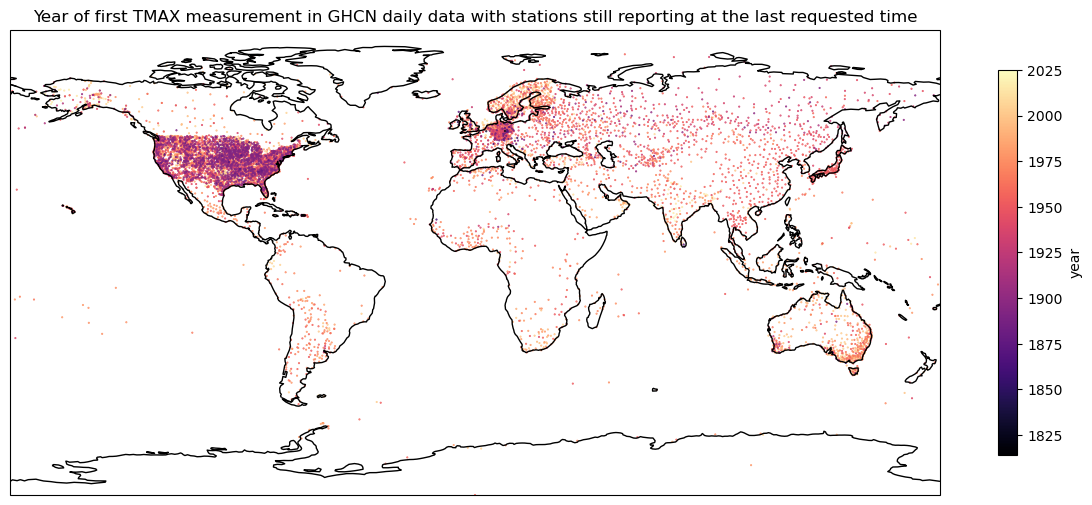

In [11]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()
ax.coastlines()

plt.scatter(merged_stns_sorted['LON_x'],merged_stns_sorted['LAT_x'],0.25,c=merged_stns_sorted['TiMIN'], 
            transform=ccrs.PlateCarree(), cmap='magma')
plt.colorbar(shrink = 0.5, label='year')
plt.title('Year of first TMAX measurement in GHCN daily data with stations still reporting at the last requested time');

In [12]:
# Query the merged_stns dataset to find stations reporting in 2025 and containing the string "Chicago" in the station name field.

merged_stns[merged_stns['NAME'].str.contains('CHICAGO', regex=False)]

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
479730,USC00111550,41.8558,-87.6094,177.7,IL,CHICAGO NORTHERLY IS,NaN,NaN,41.8558,-87.6094,TMAX,2005.0,2025.0
479751,USC00111577,41.7372,-87.7772,189.0,IL,CHICAGO MIDWAY AP 3SW,NaN,72534.0,41.7372,-87.7772,TMAX,1928.0,2025.0
724000,USW00004808,41.7714,-88.4814,213.7,IL,CHICAGO AURORA MUNI AP,NaN,NaN,41.7714,-88.4814,TMAX,1998.0,2025.0
724109,USW00004838,42.1208,-87.9047,191.7,IL,CHICAGO PALWAUKEE AP,NaN,NaN,42.1208,-87.9047,TMAX,1996.0,2025.0
736437,USW00014819,41.7842,-87.7553,185.9,IL,CHICAGO MIDWAY AP,NaN,72534.0,41.7842,-87.7553,TMAX,1997.0,2025.0
737927,USW00014880,42.4256,-87.8633,216.4,IL,CHICAGO WAUKEGAN RGNL AP,NaN,NaN,42.4256,-87.8633,TMAX,1999.0,2025.0
763444,USW00094846,41.9603,-87.9317,204.8,IL,CHICAGO OHARE INTL AP,NaN,72530.0,41.9603,-87.9317,TMAX,1958.0,2025.0
763819,USW00094892,41.8964,-88.2511,228.3,IL,CHICAGO W CHICAGO DUPAGE AP,NaN,NaN,41.8964,-88.2511,TMAX,1997.0,2025.0


In [13]:
# Decided to use data from Midway airport, Station ID USC00111577 which contains data from 1928 - 2025

In [14]:
# Read each csv file for this station and save as df

In [15]:
df = pd.read_csv(
...      "s3://noaa-ghcn-pds/csv/by_station/USC00111577.csv",
...      storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
         dtype={'Q_FLAG': 'object', 'M_FLAG': 'object'},
         parse_dates=['DATE']
... ).set_index('DATE')

In [16]:
# Read the df
df

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1928-02-29,USC00111577,TMAX,39,NaN,NaN,0,NaN
1928-02-29,USC00111577,TMIN,-28,NaN,NaN,0,NaN
1928-02-29,USC00111577,PRCP,0,T,NaN,0,NaN
1928-02-29,USC00111577,SNOW,0,T,NaN,0,NaN
1928-02-29,USC00111577,SNWD,0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...
2025-10-02,USC00111577,SNWD,0,NaN,NaN,H,2400.0
2025-10-03,USC00111577,SNWD,0,NaN,NaN,H,2400.0
2025-10-04,USC00111577,SNWD,0,NaN,NaN,H,2400.0


In [17]:
# Units are temperature values multiplied by 10, and in degrees Celsius 

In [18]:
# Use Boolean indexing to create separate dataframes for elements of interest: 
# TMAX (max temperature)
# TMIN (min temperature)

df_tmax = df.loc[df['ELEMENT'] == 'TMAX']
df_tmin = df.loc[df['ELEMENT'] == 'TMIN']

In [19]:
# View max temp dataframe
df_tmax

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1928-02-29,USC00111577,TMAX,39,NaN,NaN,0,NaN
1928-03-01,USC00111577,TMAX,22,NaN,NaN,0,NaN
1928-03-02,USC00111577,TMAX,56,NaN,NaN,0,NaN
1928-03-03,USC00111577,TMAX,28,NaN,NaN,0,NaN
1928-03-04,USC00111577,TMAX,50,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...
2025-10-02,USC00111577,TMAX,289,NaN,NaN,H,2400.0
2025-10-03,USC00111577,TMAX,322,NaN,NaN,H,2400.0
2025-10-04,USC00111577,TMAX,317,NaN,NaN,H,2400.0


In [20]:
# View min temp dataframe
df_tmin

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1928-02-29,USC00111577,TMIN,-28,NaN,NaN,0,NaN
1928-03-01,USC00111577,TMIN,-67,NaN,NaN,0,NaN
1928-03-02,USC00111577,TMIN,-39,NaN,NaN,0,NaN
1928-03-03,USC00111577,TMIN,-94,NaN,NaN,0,NaN
1928-03-04,USC00111577,TMIN,-89,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...
2025-10-02,USC00111577,TMIN,156,NaN,NaN,H,2400.0
2025-10-03,USC00111577,TMIN,189,NaN,NaN,H,2400.0
2025-10-04,USC00111577,TMIN,194,NaN,NaN,H,2400.0


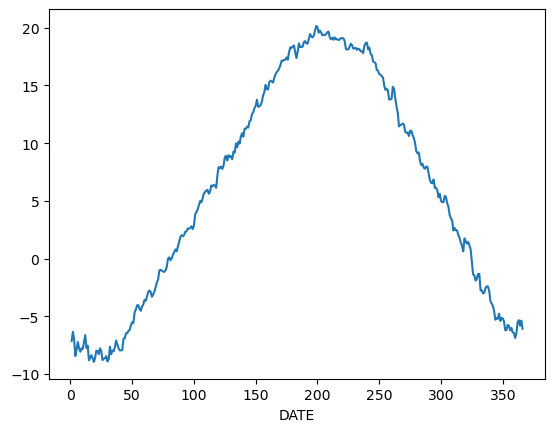

In [21]:
# Quick visualization of the minimum temp data averaged for each date throughout the calendar year, with leap year dates dropped

ser=df_tmin[~((df_tmin.index.month==2)&(df_tmin.index.day==29))]

bk_bar1 = (ser['DATA_VALUE']/10.).groupby(ser.index.day_of_year).mean().plot()

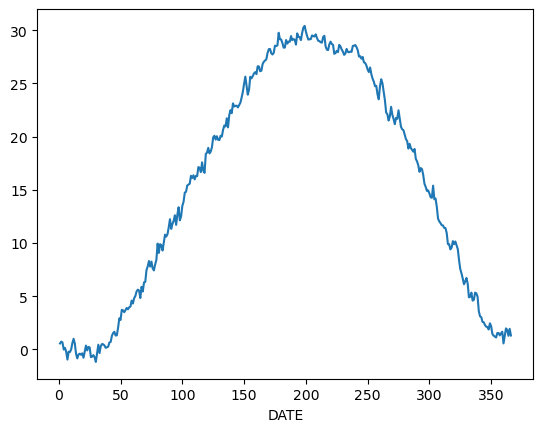

In [22]:
# Quick visualization of the maximum temp data averaged for each date throughout the calendar year, with leap year dates dropped

ser=df_tmax[~((df_tmax.index.month==2)&(df_tmax.index.day==29))]

bk_bar1 = (ser['DATA_VALUE']/10.).groupby(ser.index.day_of_year).mean().plot()

In [23]:
# calculate (1) the all time record high and low and 
# (2) the normal (mean) high and low temperature *FOR EACH CALENDAR DAY* for the 1991-2020 period for the desired station.  
# The function should return a pandas data frame with the columns ['record_min_temp', average_min_temp', 'average_max_temp', record_max_temp'] FOR EACH DAY.  

In [30]:
# Date is an index, not a column header, so I need to set it as a column header: 

df_tmax = df_tmax.reset_index()
df_tmin = df_tmin.reset_index()

In [33]:
# Confirm that the date is in a pandas datetime format:
print(df_tmax['DATE'].dtype)
print(df_tmin['DATE'].dtype)

datetime64[ns]
datetime64[ns]


In [43]:
# Calculate the record high, record low, average high, and average low for each calendar day from 1991-2020

def calendar_day_stats(df_tmax, df_tmin, start_year=1991, end_year=2020):

    # Filter for years 1991 - 2020
    df_tmax = df_tmax[(df_tmax['DATE'].dt.year >= start_year) & (df_tmax['DATE'].dt.year <= end_year)]
    df_tmin = df_tmin[(df_tmin['DATE'].dt.year >= start_year) & (df_tmin['DATE'].dt.year <= end_year)]
    
    # Add column for month-day so that we can aggregate by date and ignore year
    df_tmax['month_day'] = df_tmax['DATE'].dt.strftime('%m-%d')
    df_tmin['month_day'] = df_tmin['DATE'].dt.strftime('%m-%d')
    
    # Group by month and day, use .agg to find the mean and max
    tmax_daily = df_tmax.groupby(['month_day'])['DATA_VALUE'].agg(
        average_max_temp='mean',
        record_max_temp='max'
    )
    # Group by month and day, use .agg to find the mean and min
    tmin_daily = df_tmin.groupby(['month_day'])['DATA_VALUE'].agg(
        average_min_temp='mean',
        record_min_temp='min'
    )
    
    # Merge these into one pandas dataframe
    daily = pd.concat([tmin_daily, tmax_daily], axis=1).reset_index()
    
    # Set order of columns
    daily = daily[['month_day', 'record_min_temp', 'average_min_temp',
                               'average_max_temp', 'record_max_temp']]
    
    return daily


In [57]:
daily_temp_stats = calendar_day_stats(df_tmax, df_tmin)
print(daily_temp_stats)

    month_day  record_min_temp  average_min_temp  average_max_temp  \
0       01-01             -217        -67.633333         13.900000   
1       01-02             -233        -57.633333         15.166667   
2       01-03             -200        -60.133333         14.466667   
3       01-04             -222        -61.600000         13.700000   
4       01-05             -261        -74.266667          5.400000   
..        ...              ...               ...               ...   
361     12-27             -194        -44.733333         25.300000   
362     12-28             -167        -40.300000         27.100000   
363     12-29             -128        -42.866667         29.266667   
364     12-30             -178        -47.200000         23.233333   
365     12-31             -178        -50.733333         15.433333   

     record_max_temp  
0                111  
1                161  
2                139  
3                178  
4                133  
..               ... 

/tmp/ipykernel_2200/1732674467.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmax['month_day'] = df_tmax['DATE'].dt.strftime('%m-%d')
/tmp/ipykernel_2200/1732674467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmin['month_day'] = df_tmin['DATE'].dt.strftime('%m-%d')


In [58]:
# Daily temp stats are still in degrees celsius multipled by 10. Divide by 10 to get actual temps in celsius. 

columns = ['record_min_temp', 'average_min_temp', 'average_max_temp', 'record_max_temp']
daily_temp_stats[columns] = daily_temp_stats[columns] / 10

daily_temp_stats

,month_day,record_min_temp,average_min_temp,average_max_temp,record_max_temp
0,01-01,-21.7,-6.763333,1.390000,11.1
1,01-02,-23.3,-5.763333,1.516667,16.1
2,01-03,-20.0,-6.013333,1.446667,13.9
3,01-04,-22.2,-6.160000,1.370000,17.8
4,01-05,-26.1,-7.426667,0.540000,13.3
...,...,...,...,...,...
361,12-27,-19.4,-4.473333,2.530000,16.7
362,12-28,-16.7,-4.030000,2.710000,12.2
363,12-29,-12.8,-4.286667,2.926667,14.4
364,12-30,-17.8,-4.720000,2.323333,15.6


In [47]:
# Plot these 4 columns

In [48]:
import matplotlib.pyplot as plt

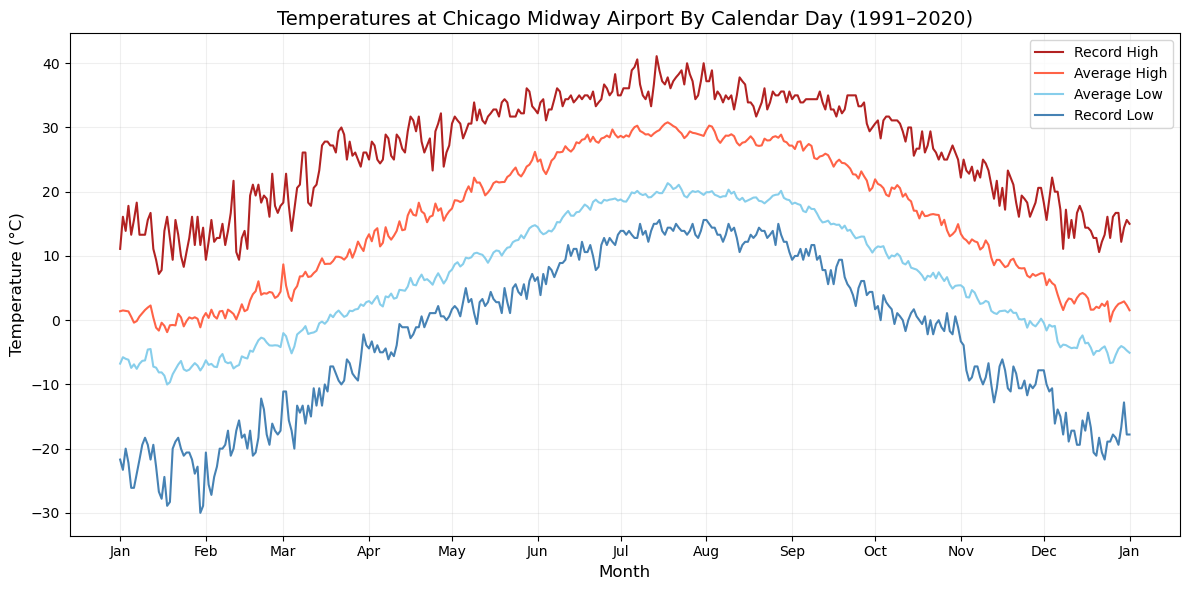

In [62]:
plt.figure(figsize=(12, 6))



plt.plot(daily_temp_stats['month_day'], daily_temp_stats['record_max_temp'], color='firebrick', label='Record High')
plt.plot(daily_temp_stats['month_day'], daily_temp_stats['average_max_temp'], color='tomato', label='Average High')
plt.plot(daily_temp_stats['month_day'], daily_temp_stats['average_min_temp'], color='skyblue', label='Average Low')
plt.plot(daily_temp_stats['month_day'], daily_temp_stats['record_min_temp'], color='steelblue', label='Record Low')

# Convert 'month_day' (string) into a dummy datetime so that matplotlib can add months to the x axis 
daily_temp_stats['date'] = pd.to_datetime('2020-' + daily_temp_stats['month_day'], format='%Y-%m-%d')

# Format x-axis to show months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.title('Temperatures at Chicago Midway Airport By Calendar Day (1991–2020)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()